In [1]:
# 1️⃣ Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import joblib

In [3]:
# ===============================================================
# 2️⃣ Load Dataset
# ===============================================================
df = pd.read_csv("student.csv")
df = df.drop(columns=['Unnamed: 0', 'Id'], errors='ignore')

print("✅ 5 Baris Pertama Data:")
display(df.head())

print("\nInformasi Data:")
print(df.info())

✅ 5 Baris Pertama Data:


,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA



Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_Age         145 non-null    int64 
 1   Sex                 145 non-null    object
 2   High_School_Type    145 non-null    object
 3   Scholarship         144 non-null    object
 4   Additional_Work     145 non-null    object
 5   Sports_activity     145 non-null    object
 6   Transportation      145 non-null    object
 7   Weekly_Study_Hours  145 non-null    int64 
 8   Attendance          145 non-null    object
 9   Reading             145 non-null    object
 10  Notes               145 non-null    object
 11  Listening_in_Class  145 non-null    object
 12  Project_work        145 non-null    object
 13  Grade               145 non-null    object
dtypes: int64(2), object(12)
memory usage: 16.0+ KB
None


In [4]:
# ===============================================================
# 3️⃣ Encoding Kolom Kategorikal
# ===============================================================
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\n✅ Data setelah encoding:")
display(df.head())


✅ Data setelah encoding:


,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,1,0,2,1,0,1,0,1,1,2,1,0,0
1,20,1,0,2,1,0,1,0,1,1,1,2,1,0
2,21,1,2,2,0,0,1,2,2,0,1,1,1,0
3,18,0,1,2,1,0,0,2,1,0,2,1,0,0
4,22,1,1,2,0,0,0,12,1,1,1,2,1,0


In [5]:
# ===============================================================
# 4️⃣ Pisahkan Fitur & Target
# ===============================================================
X = df.drop('Grade', axis=1)
y = df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


Ukuran data:
X_train: (116, 13)
X_test : (29, 13)


In [6]:
# ===============================================================
# 5️⃣ Training Model Random Forest
# ===============================================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


🎯 Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.67      0.25         3
           1       0.17      0.25      0.20         4
           2       0.67      0.33      0.44         6
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         4

    accuracy                           0.21        29
   macro avg       0.25      0.22      0.20        29
weighted avg       0.25      0.21      0.19        29


✅ Akurasi Training : 1.0
✅ Akurasi Testing  : 0.20689655172413793


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

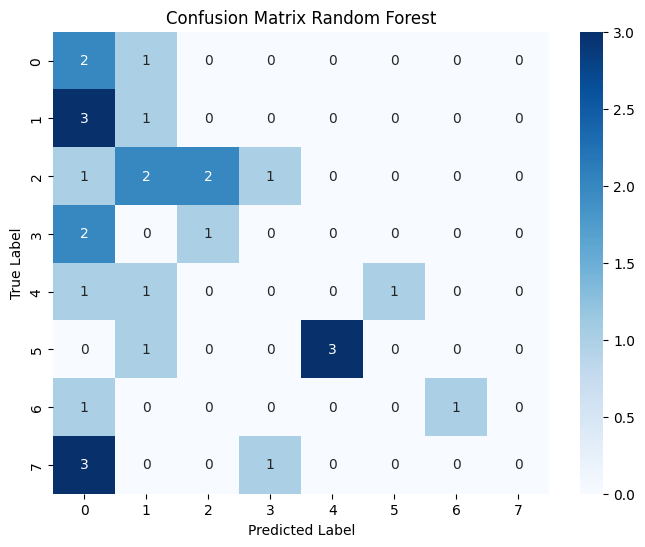

In [7]:
# ===============================================================
# 6️⃣ Evaluasi Model
# ===============================================================
y_pred = model.predict(X_test)
print("\n🎯 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n✅ Akurasi Training :", accuracy_score(y_train, model.predict(X_train)))
print("✅ Akurasi Testing  :", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

📈 Nilai AUC (macro average): 0.587


C:\Users\user\AppData\Local\Temp\ipykernel_16292\3186853234.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


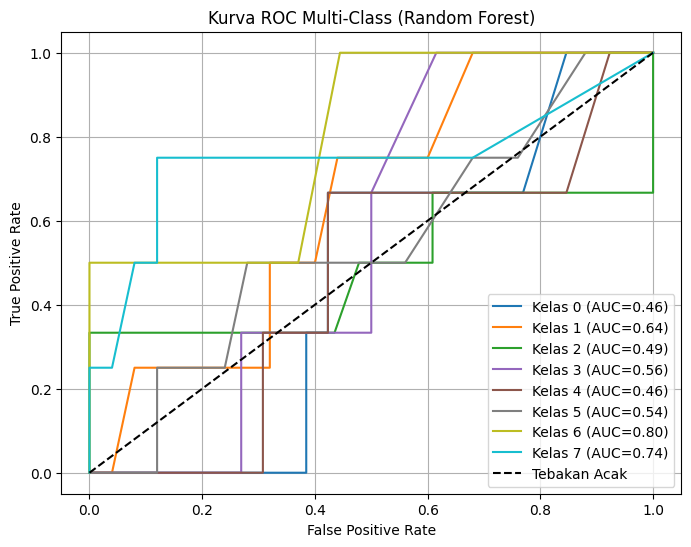

In [20]:
# ===============================================================
# 8️⃣ ROC Curve & AUC Score (Multi-Class)
# ===============================================================
from sklearn.preprocessing import label_binarize

# Binarisasi label (multi-class → one-vs-rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Prediksi probabilitas
y_pred_proba = model.predict_proba(X_test)

# Hitung AUC (macro average)
auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')
print(f"📈 Nilai AUC (macro average): {auc:.3f}")

# Plot ROC Curve untuk tiap kelas
plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, color=colors(i), label=f'Kelas {np.unique(y)[i]} (AUC={roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Tebakan Acak')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC Multi-Class (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_16292\4268213021.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=feat_imp, palette='viridis')


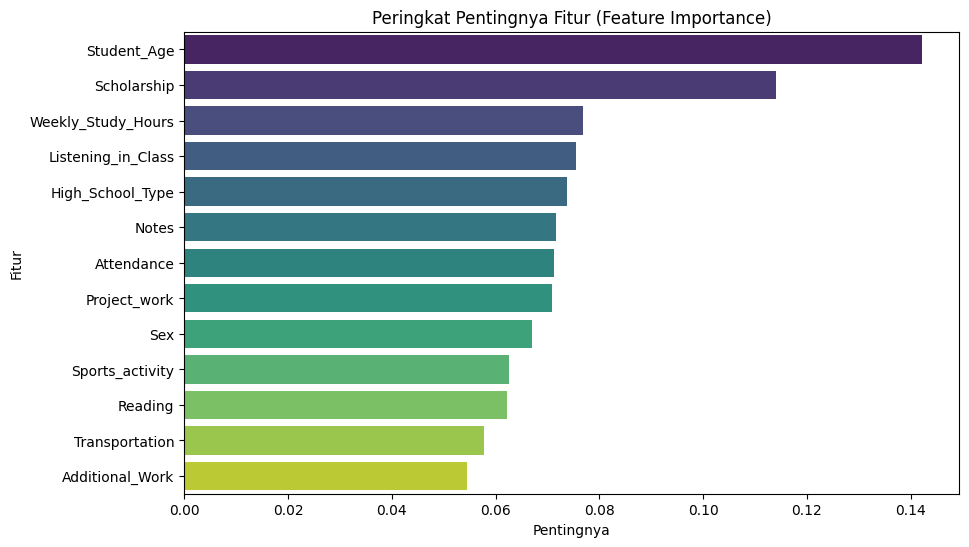

In [21]:
# Feature Importance
importances = model.feature_importances_
feat_imp = pd.DataFrame({
    'Fitur': X.columns,
    'Pentingnya': importances
}).sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Pentingnya', y='Fitur', data=feat_imp, palette='viridis')
plt.title("Peringkat Pentingnya Fitur (Feature Importance)")
plt.show()

In [22]:
# ===============================================================
# 7️⃣ Simpan Model ke File
# ===============================================================
joblib.dump(model, "model.pkl")
print("\n💾 Model berhasil disimpan ke file: model.pkl")

# (Opsional) simpan label encoder juga
joblib.dump(label_encoders, "label_encoders.pkl")
print("💾 Label encoder disimpan: label_encoders.pkl")


💾 Model berhasil disimpan ke file: model.pkl
💾 Label encoder disimpan: label_encoders.pkl
